In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
data = pd.read_csv("Leads.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


DATA CLEANING START

In [158]:
data.isnull().mean()[data.isnull().mean() * 100 > 40] * 100

Lead Quality                   51.590909
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Index     45.649351
Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
dtype: float64

In [159]:
data_1 = data.drop(data.isnull().mean()[data.isnull().mean() * 100 > 40].index, axis=1)
data_1.isnull().mean()[data_1.isnull().mean() * 100 > 40] * 100

Series([], dtype: float64)

In [160]:
data_1.isnull().mean()[data_1.isnull().mean() * 100 > 5] * 100

Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Profile                                     29.318182
City                                             15.367965
dtype: float64

In [161]:
data_1['Country'].value_counts(normalize=True)

Country
India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vi

In [162]:
data_1['Country'].fillna(data_1['Country'].mode()[0], inplace=True)
data_1['Country'].isnull().mean()

0.0

In [163]:
data_1['Specialization'].value_counts(normalize=True)

Specialization
Select                               0.248911
Finance Management                   0.125096
Human Resource Management            0.108690
Marketing Management                 0.107408
Operations Management                0.064471
Business Administration              0.051653
IT Projects Management               0.046911
Supply Chain Management              0.044732
Banking, Investment And Insurance    0.043322
Travel and Tourism                   0.026019
Media and Advertising                0.026019
International Business               0.022815
Healthcare Management                0.020379
Hospitality Management               0.014612
E-COMMERCE                           0.014355
Retail Management                    0.012817
Rural and Agribusiness               0.009357
E-Business                           0.007306
Services Excellence                  0.005127
Name: proportion, dtype: float64

In [164]:
data_1['Specialization'].fillna(data_1['Specialization'].mode()[0], inplace=True)

In [165]:
data_1['Specialization'].value_counts(normalize=True)

Specialization
Select                               0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: proportion, dtype: float64

In [166]:
data_1['Specialization'].replace('Select', 'Not Specified', inplace=True)
data_1['Specialization'].mode()

0    Not Specified
Name: Specialization, dtype: object

In [167]:
data_1['How did you hear about X Education'].value_counts(normalize=True)

How did you hear about X Education
Select                   0.717048
Online Search            0.114887
Word Of Mouth            0.049481
Student of SomeSchool    0.044078
Other                    0.026447
Multiple Sources         0.021612
Advertisements           0.009953
Social Media             0.009527
Email                    0.003697
SMS                      0.003270
Name: proportion, dtype: float64

In [168]:
data_1.drop(columns='How did you hear about X Education', inplace=True)
'How did you hear about X Education' in data_1.columns

False

In [169]:
data_1['What is your current occupation'].value_counts(normalize=True)

What is your current occupation
Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: proportion, dtype: float64

In [170]:
data_1['What is your current occupation'].fillna(data_1['What is your current occupation'].mode()[0], inplace=True)
data_1['What is your current occupation'].isnull().mean()

0.0

In [171]:
data_1['What matters most to you in choosing a course'].value_counts(normalize=True)

What matters most to you in choosing a course
Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: proportion, dtype: float64

In [172]:
data_1['What matters most to you in choosing a course'].fillna(data_1['What matters most to you in choosing a course'].mode()[0], inplace=True)
data_1['What matters most to you in choosing a course'].isnull().mean()

0.0

In [173]:
data_1['Tags'].value_counts(normalize=True)

Tags
Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in 

In [174]:
data_1['Tags'].fillna(data_1['Tags'].mode()[0], inplace=True)
data_1['Tags'].isnull().mean()

0.0

In [175]:
data_1['Lead Profile'].value_counts(normalize=True)

Lead Profile
Select                         0.634819
Potential Lead                 0.246976
Other Leads                    0.074567
Student of SomeSchool          0.036901
Lateral Student                0.003675
Dual Specialization Student    0.003062
Name: proportion, dtype: float64

In [176]:
data_1.drop(columns='Lead Profile', inplace=True)
'Lead Profile' in data_1.columns

False

In [177]:
data_1['City'].value_counts(normalize=True)

City
Mumbai                         0.412020
Select                         0.287596
Thane & Outskirts              0.096164
Other Cities                   0.087724
Other Cities of Maharashtra    0.058440
Other Metro Cities             0.048593
Tier II Cities                 0.009463
Name: proportion, dtype: float64

In [178]:
data_1['City'].fillna('Select', inplace=True)
data_1['City'].value_counts(normalize=True)

City
Select                         0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: proportion, dtype: float64

In [179]:
data_1.drop(columns='City', inplace=True)
'City' in data_1.columns

False

In [180]:
data_1.isnull().mean()[data_1.isnull().mean() * 100 > 0] * 100

Lead Source             0.389610
TotalVisits             1.482684
Page Views Per Visit    1.482684
Last Activity           1.114719
dtype: float64

In [181]:
data_1.dropna(inplace=True)
data_1.isnull().mean()[data_1.isnull().mean() * 100 > 0] * 100

Series([], dtype: float64)

In [182]:
data_1[data_1.duplicated() == True]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


DATA CLEANING DONE

In [183]:
leads = data_1.copy()

In [184]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [185]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,Ringing,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


In [186]:
leads.drop(columns=['Prospect ID', 'Lead Number'], inplace=True)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,...,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,Ringing,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


EDA START

In [187]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [188]:
numeric_columns = list(leads.select_dtypes(include='number').columns)
numeric_columns

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [189]:
leads[numeric_columns].head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0.0,0,0.0
1,0,5.0,674,2.5
2,1,2.0,1532,2.0
3,0,1.0,305,1.0
4,1,2.0,1428,1.0


In [190]:
categorical_columns = list(leads.select_dtypes(exclude='number').columns)
categorical_columns

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [191]:
categorical_columns.append('Converted')
categorical_columns

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity',
 'Converted']

In [192]:
numeric_columns.remove('Converted')
numeric_columns

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

Outlier Analysis

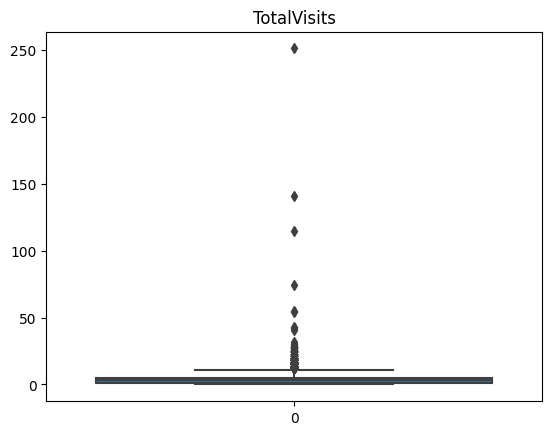

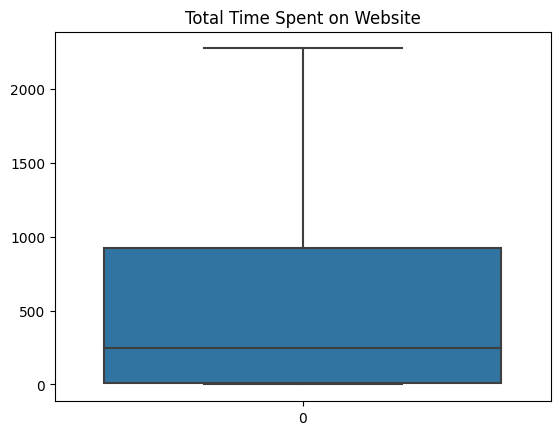

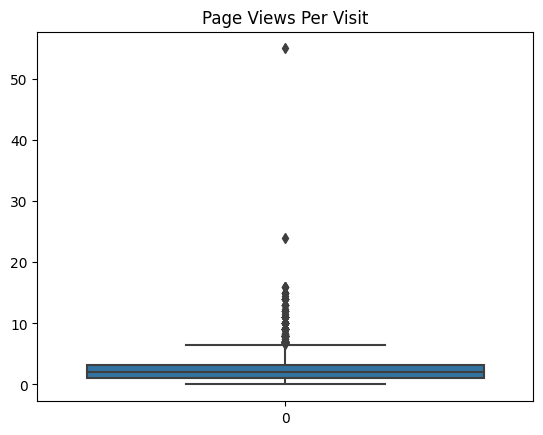

In [193]:
for column in numeric_columns:
    sns.boxplot(data=leads[column])
    plt.title(column)
    plt.show()

In [194]:
# Defining a function to calculate upper-fence of data

def upper_fence(data, column):
    
    q1 = data[column].describe()["25%"] # Lower quartile
    q3 = data[column].describe()["75%"] # Upper quartile
    iqr = q3 - q1 #inter-quartile range
    return q3 + (iqr * 1.5)  #upper-fence value

In [195]:
upper_fence_total_visits = upper_fence(leads, 'TotalVisits')
upper_fence_total_visits

11.0

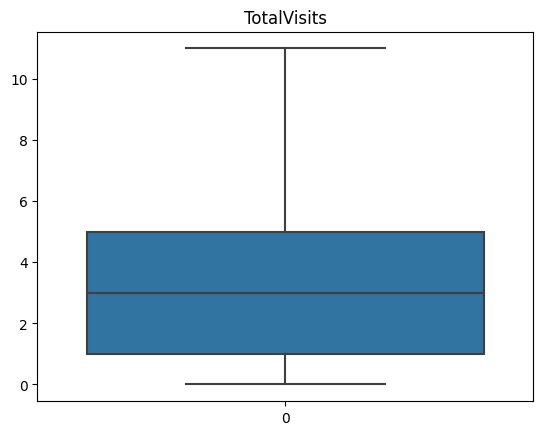

In [196]:
leads.loc[leads['TotalVisits'] >= upper_fence_total_visits, 'TotalVisits'] = upper_fence_total_visits
sns.boxplot(data=leads['TotalVisits'])
plt.title('TotalVisits')
plt.show()

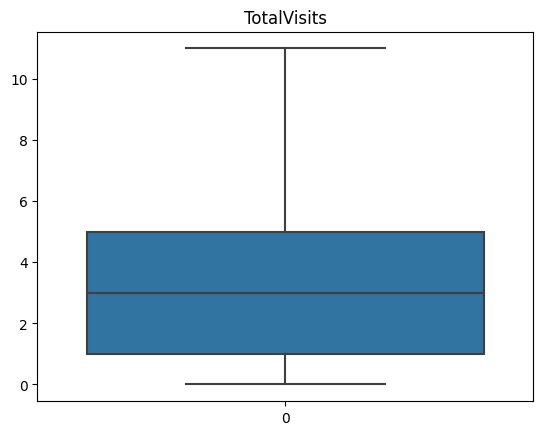

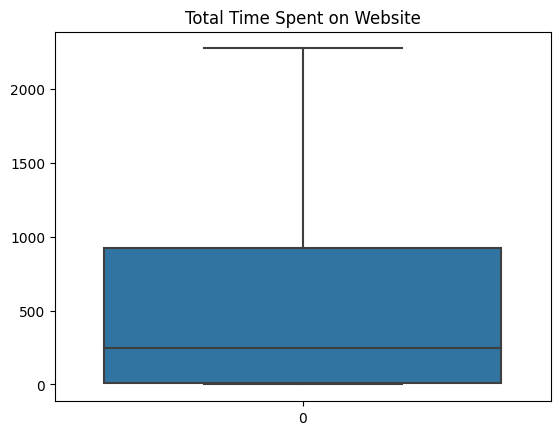

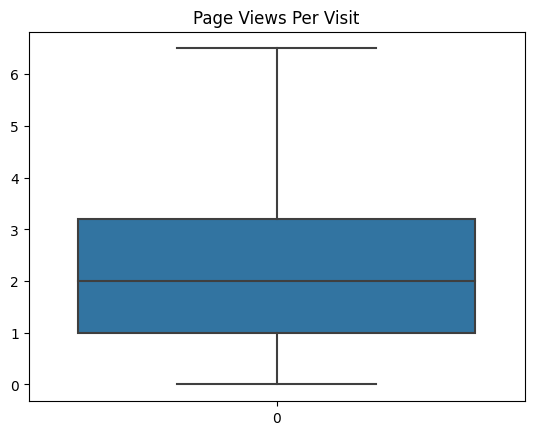

In [197]:
for column in numeric_columns:
    upper_fence_column = upper_fence(leads, column)
    leads.loc[leads[column] >= upper_fence_column, column] = upper_fence_column
    sns.boxplot(data=leads[column])
    plt.title(column)
    plt.show()

Data Preprocessing

In [198]:
def add_levels(data, var):
    levels = pd.get_dummies(data[var], drop_first=True) # Getting the dummy variables, dropping the first level for multicollinearity considerations
    for col in levels.columns:
        levels[col] = levels[col].astype('int') # This section is so that the dummy variables gotten will be of 'int' data type and not 'bool'
    levels.rename(columns={col: f'{var}_{col}' for col in levels.columns}, inplace=True) # renaming the columns for convenience
    data = pd.concat([data, levels], axis=1) # adding the levels to the dataframe
    data.drop(columns=var, inplace=True) # removing the original categorical variable
    return data

In [199]:
for var in categorical_columns:
    if var == 'Converted':
        continue
    leads = add_levels(leads, var)
    
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674.0,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532.0,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305.0,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428.0,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [200]:
from sklearn.model_selection import train_test_split 

leads_train, leads_test = train_test_split(leads, test_size=0.7, random_state=100)

In [201]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
leads_train[numeric_columns] = scaler.fit_transform(leads_train[numeric_columns]) # scaling the data 
leads_train.head() # checking if scaling was successful

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7076,1,-0.430052,-0.730476,-0.158648,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1042,0,-1.120673,-0.887831,-1.237752,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8698,0,-0.775362,-0.033616,-0.698200,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
9239,1,0.951189,1.508093,0.380903,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8349,0,0.260568,1.405062,-0.520148,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


Feature Selection

In [203]:
y_train = leads.pop('Converted')
X_train = leads

In [202]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [205]:
from sklearn.feature_selection import RFE
logreg.fit(X_train, y_train)
rfe = RFE(logreg, n_features_to_select=15)
rfe.fit(X_train, y_train)

c:\Users\PRATIK SINHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\PRATIK SINHA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [208]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_)) 

[('TotalVisits', False, 94),
 ('Total Time Spent on Website', False, 124),
 ('Page Views Per Visit', False, 93),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 112),
 ('Lead Source_Direct Traffic', False, 88),
 ('Lead Source_Facebook', False, 36),
 ('Lead Source_Google', False, 89),
 ('Lead Source_Live Chat', False, 100),
 ('Lead Source_NC_EDM', False, 40),
 ('Lead Source_Olark Chat', False, 37),
 ('Lead Source_Organic Search', False, 63),
 ('Lead Source_Pay per Click Ads', False, 128),
 ('Lead Source_Press_Release', False, 98),
 ('Lead Source_Reference', False, 116),
 ('Lead Source_Referral Sites', False, 81),
 ('Lead Source_Social Media', False, 29),
 ('Lead Source_WeLearn', False, 39),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 57),
 ('Lead Source_blog', False, 50),
 ('Lead Source_google', False, 68),
 ('Lead Source_testone', False, 117),
 ('Lead Source_welearnblog_Home', F

In [209]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Specialization_Not Specified',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [210]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       ...
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=138)

In [211]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Specialization_Not Specified,What is your current occupation_Unemployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in Next batch,Tags_Lateral student,Tags_Lost to EINS,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0


In [213]:
import statsmodels.api as sm

X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Specialization_Not Specified,What is your current occupation_Unemployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in Next batch,Tags_Lateral student,Tags_Lost to EINS,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
0,1.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,1.0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1.0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0
